# **Thresholding, Binarization & Adaptive Thresholding**

1. Binarized Images
2. Thresholding Methods
3. Adaptive Thresholding
4. SkImage's Threshold Local

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Computer visionda thresholding, görüntü işleme işleminin bir parçası olarak kullanılan bir yöntemdir. Thresholding, bir görüntü üzerinde belirli bir eşik değeri (threshold) kullanarak pikselleri iki farklı gruba ayırmak amacıyla kullanılır. Genellikle bu iki grup, bir nesne veya nesneler ve arka planı temsil eder.

Thresholding işlemi şu adımları içerir:

Görüntüyü İşleme: Öncelikle, bir siyah-beyaz (grayscale) veya ikili (binary) görüntü ile çalışmak için renkli bir görüntüyü gri tonlama dönüşümü ile işleyebilirsiniz. Böylece her pikselin yoğunluğu (grayscale) veya siyah/beyaz (binary) bir değere sahip olur.

Eşik Değeri Seçme: Eşik değeri, görüntüdeki nesne ve arka planı ayırmak için kullanılan bir eşik değeridir. Bu değeri manuel olarak seçebilirsiniz veya otomatik eşikleme algoritmalarını kullanabilirsiniz.

Thresholding İşlemi: Her pikselin değeri, seçilen eşik değeri ile karşılaştırılır. Eşik değerini aşan pikseller bir grupta (genellikle beyaz veya 1 olarak temsil edilen nesne) bulunurken, eşik değerini geçmeyenler diğer grupta (genellikle siyah veya 0 olarak temsil edilen arka plan) bulunur.

Thresholding, birçok farklı uygulama için kullanılabilir. Örneğin, kenar tespiti, nesne tanıma, nesne izleme ve görüntü segmentasyonu gibi işlemlerde yaygın olarak kullanılır. Otomatik plaka tanıma, yüz tanıma, nesne sayımı ve tıbbi görüntüleme gibi birçok uygulama alanında thresholding önemli bir rol oynamaktadır.

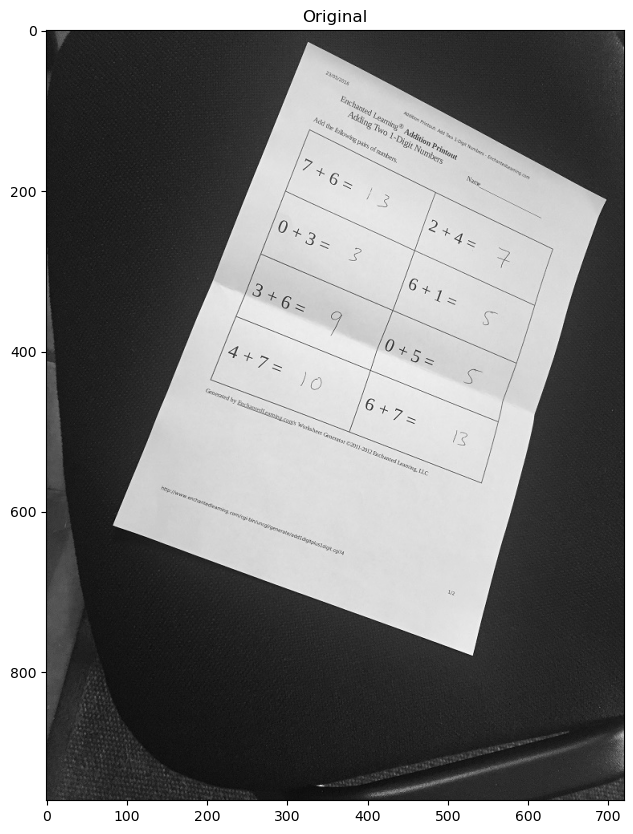

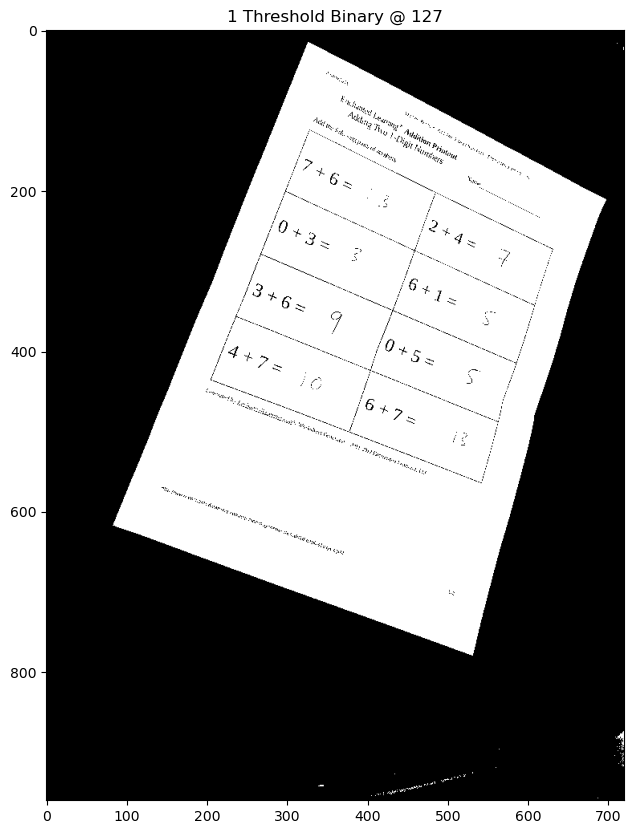

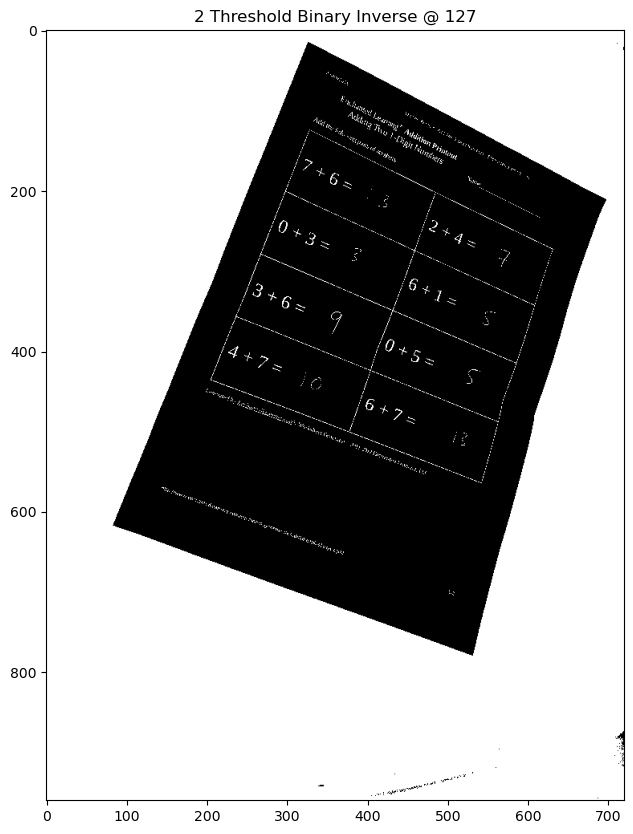

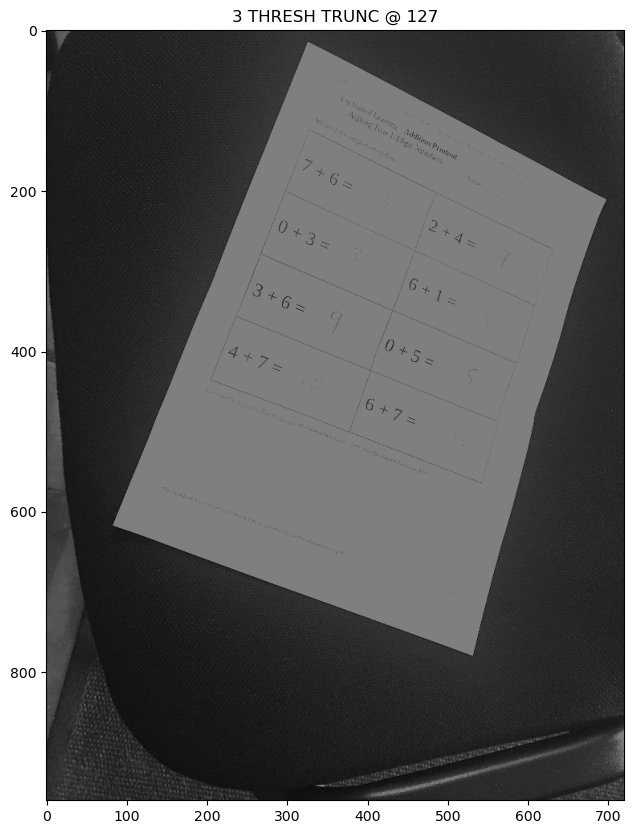

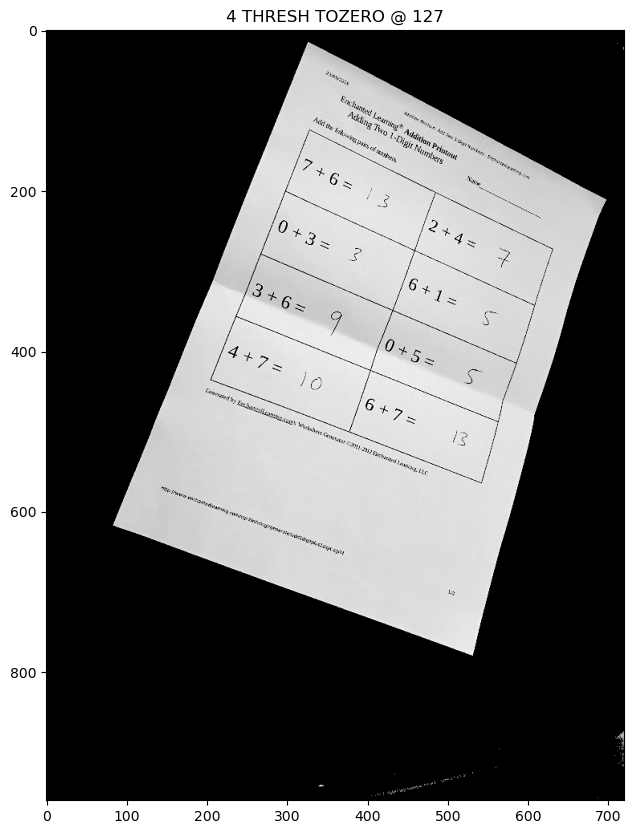

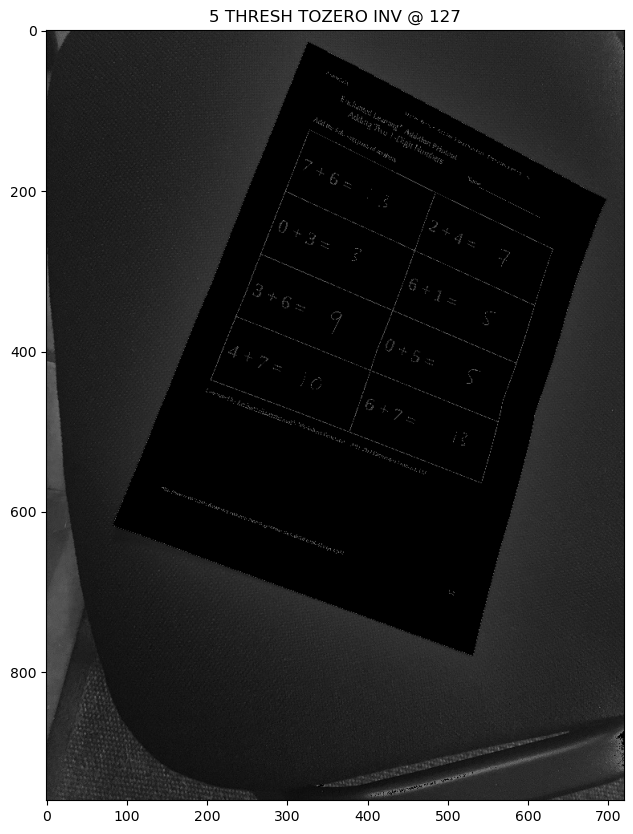

In [6]:
image = cv2.imread('images/scan.jpg',0)
imshow("Original", image)

ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary @ 127', thresh1)

ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow('2 Threshold Binary Inverse @ 127', thresh2)

ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow('3 THRESH TRUNC @ 127', thresh3)

ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow('4 THRESH TOZERO @ 127', thresh4)

ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 THRESH TOZERO INV @ 127', thresh5)

#### **Adaptive Thresholding**

1. ADAPTIVE_THRESH_MEAN_C
2. THRESH_OTSU

#### **cv2.adaptiveThreshold Parameters**

``**cv2.adaptiveThreshold**(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst``

- **src** – Source 8-bit single-channel image.
- **dst** – Destination image of the same size and the same type as src .
- **maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
- **adaptiveMethod** – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- **thresholdType** – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
- **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- **C** – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.

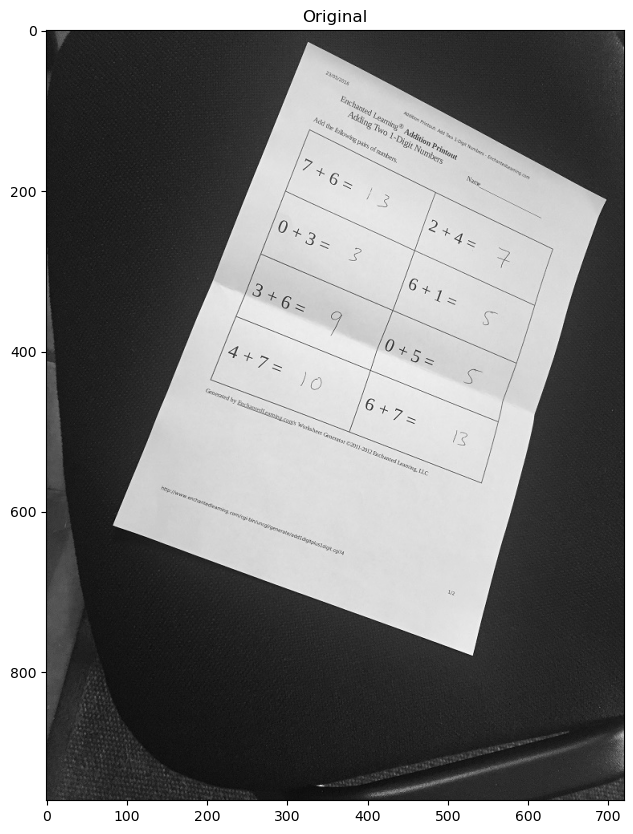

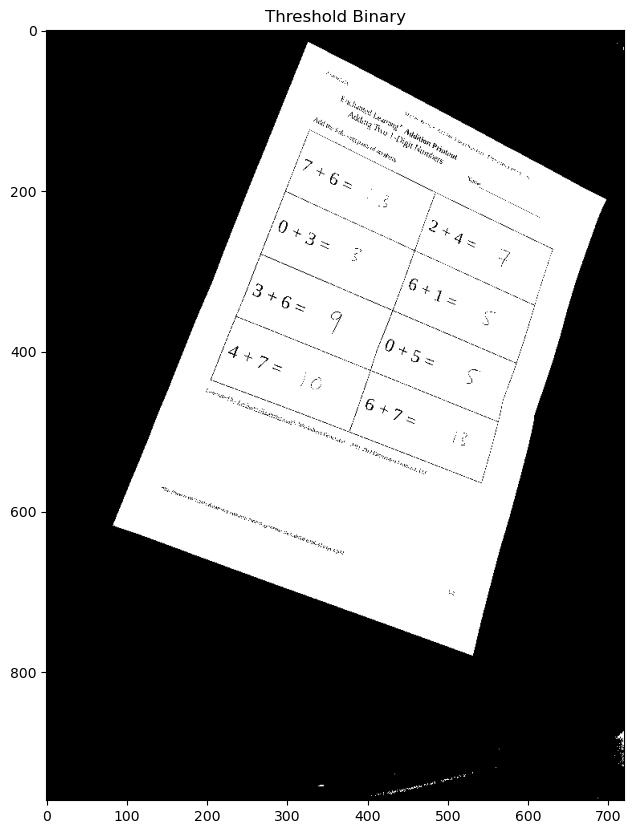

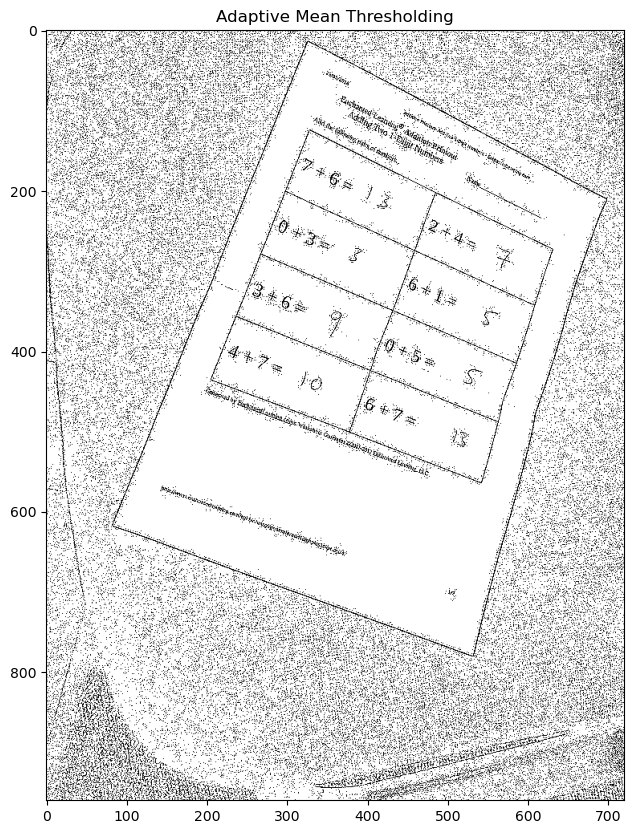

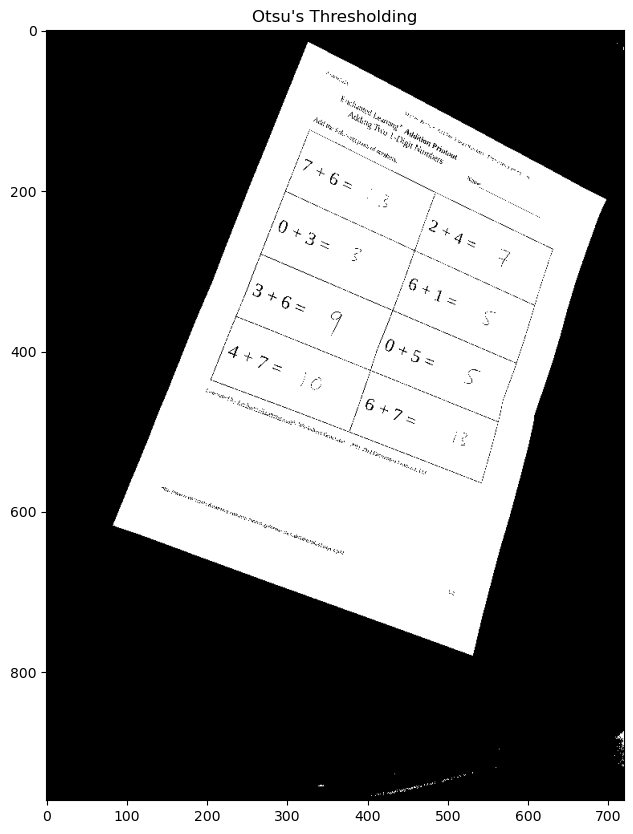

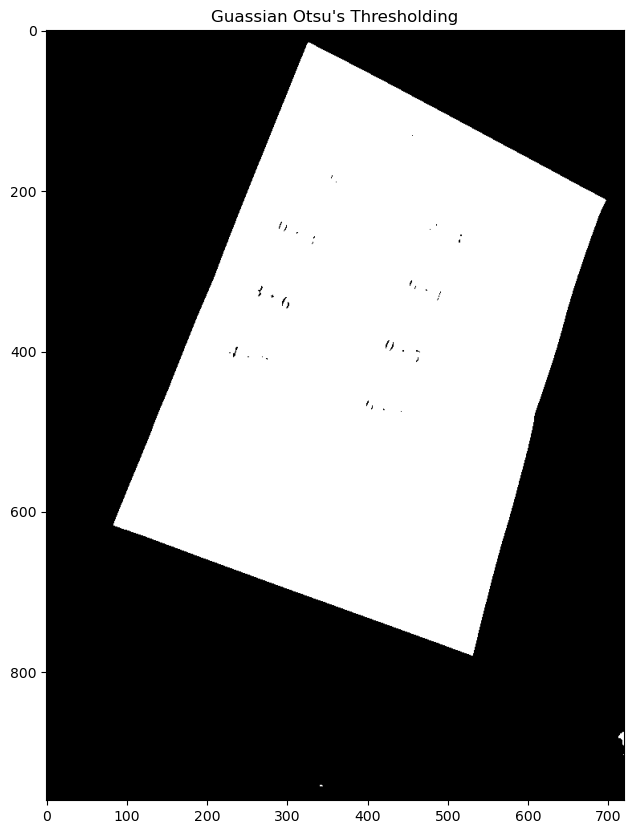

In [8]:
image = cv2.imread('images/scan.jpg',0)
imshow("Original", image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

# It's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
imshow("Adaptive Mean Thresholding", thresh) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Otsu's Thresholding", th2) 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Guassian Otsu's Thresholding", th3) 